In [1]:
import pandas as pd
import numpy as np
import konlpy
import sys
if sys.version_info <= (2,7):
    reload(sys)
    sys.setdefaultencoding('utf-8')
from konlpy.tag import Kkma, Okt, Hannanum
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
kkma = Kkma()
okt = Okt()
hannanum = Hannanum()


bal=pd.read_csv('data/melonbal.csv', encoding='cp949')
dan=pd.read_csv('data/melondan.csv', encoding='cp949')
hip=pd.read_csv('data/melonhip.csv', encoding='cp949')
rb=pd.read_csv('data/melonr_b.csv', encoding='cp949')
indi=pd.read_csv('data/melonindi.csv', encoding='cp949')
rock=pd.read_csv('data/melonrock.csv', encoding='cp949')
tst=pd.read_csv('data/melontwist.csv', encoding='cp949')
bf=pd.read_csv('data/melonbluefork.csv', encoding='cp949')

###### 제목,랭크 없애기

In [2]:
bal=bal.drop([' 제목'], axis=1)
bal=bal.drop(['랭크'], axis=1)
dan=dan.drop([' 제목'], axis=1)
dan=dan.drop(['랭크'], axis=1)
hip=hip.drop([' 제목'], axis=1)
hip=hip.drop(['랭크'], axis=1)
rb=rb.drop([' 제목'], axis=1)
rb=rb.drop(['랭크'], axis=1)
indi=indi.drop([' 제목'], axis=1)
indi=indi.drop(['랭크'], axis=1)
rock=rock.drop([' 제목'], axis=1)
rock=rock.drop(['랭크'], axis=1)
tst=tst.drop([' 제목'], axis=1)
tst=tst.drop(['랭크'], axis=1)
bf=bf.drop([' 제목'], axis=1)
bf=bf.drop(['랭크'], axis=1)

###### 봄 여름 가을 겨울 (1,2,3,4)

In [3]:
bal.loc[(bal['발매월']>=3) & (bal['발매월']<=5), 'date']=1
bal.loc[(bal['발매월']>=6) & (bal['발매월']<=8), 'date']=2
bal.loc[(bal['발매월']>=9) & (bal['발매월']<=11), 'date']=3
bal=bal.fillna(4)
bal=bal.drop(['발매월'], axis=1)

dan.loc[(dan['발매월']>=3) & (dan['발매월']<=5), 'date']=1
dan.loc[(dan['발매월']>=6) & (dan['발매월']<=8), 'date']=2
dan.loc[(dan['발매월']>=9) & (dan['발매월']<=11), 'date']=3
dan=dan.fillna(4)
dan=dan.drop(['발매월'], axis=1)

hip.loc[(hip['발매월']>=3) & (hip['발매월']<=5), 'date']=1
hip.loc[(hip['발매월']>=6) & (hip['발매월']<=8), 'date']=2
hip.loc[(hip['발매월']>=9) & (hip['발매월']<=11), 'date']=3
hip=hip.fillna(4)
hip=hip.drop(['발매월'], axis=1)

rb.loc[(rb['발매월']>=3) & (rb['발매월']<=5), 'date']=1
rb.loc[(rb['발매월']>=6) & (rb['발매월']<=8), 'date']=2
rb.loc[(rb['발매월']>=9) & (rb['발매월']<=11), 'date']=3
rb=rb.fillna(4)
rb=rb.drop(['발매월'], axis=1)

indi.loc[(indi['발매월']>=3) & (indi['발매월']<=5), 'date']=1
indi.loc[(indi['발매월']>=6) & (indi['발매월']<=8), 'date']=2
indi.loc[(indi['발매월']>=9) & (indi['발매월']<=11), 'date']=3
indi=indi.fillna(4)
indi=indi.drop(['발매월'], axis=1)

rock.loc[(rock['발매월']>=3) & (rock['발매월']<=5), 'date']=1
rock.loc[(rock['발매월']>=6) & (rock['발매월']<=8), 'date']=2
rock.loc[(rock['발매월']>=9) & (rock['발매월']<=11), 'date']=3
rock=rock.fillna(4)
rock=rock.drop(['발매월'], axis=1)

tst.loc[(tst['발매월']>=3) & (tst['발매월']<=5), 'date']=1
tst.loc[(tst['발매월']>=6) & (tst['발매월']<=8), 'date']=2
tst.loc[(tst['발매월']>=9) & (tst['발매월']<=11), 'date']=3
tst=tst.fillna(4)
tst=tst.drop(['발매월'], axis=1)

bf.loc[(bf['발매월']>=3) & (bf['발매월']<=5), 'date']=1
bf.loc[(bf['발매월']>=6) & (bf['발매월']<=8), 'date']=2
bf.loc[(bf['발매월']>=9) & (bf['발매월']<=11), 'date']=3
bf=bf.fillna(4)
bf=bf.drop(['발매월'], axis=1)

In [4]:
bal.head()

,타입,성별,가사,date
0,그룹,남성,길었던 겨우내 줄곧 품이 좀 남는 밤색 코트 그 속에 나를 쏙 감추고 걸음을 재촉해...,1.0
1,솔로,여성,월요일엔 아마 바쁘지 않을까 화요일도 성급해 보이지 안 그래 수요일은 뭔가 어정쩡한...,4.0
2,솔로,여성,너의 그 한 마디 말도 그 웃음도 나에겐 커다란 의미 너의 그 작은 눈빛도 쓸쓸한 ...,1.0
3,솔로,남성,어느새 길어진 그림자를 따라서 땅거미 진 어둠 속을 그대와 걷고 있네요 손을 마주잡...,3.0
4,그룹,혼성,니 생각에 꽤 즐겁고 니 생각에 퍽 외로워 이상한 일이야 누굴 좋아한단 건 아무 일...,3.0


In [5]:
dan.head()

,타입,성별,가사,date
0,솔로,여성,하얀 눈이 내려올 때면 온 세상이 물들을 때면 눈꽃이 피어나 또 빛이 나 눈이 부신...,4.0
1,솔로,여성,어쩜 이렇게 하늘은 더 파란 건지 오늘따라 왜 바람은 또 완벽한지 그냥 모르는 척 ...,4.0
2,솔로,여성,시곌 보며 속삭이는 비밀들 간절한 내 맘속 이야기 지금 내 모습을 해쳐도 좋아 나를...,3.0
3,그룹,여성,기억하나요 우리 함께 했던 시간 L O V E LUV 설레이나요 한 땐 모든 것이었...,3.0
4,그룹,남성,거짓말 늦은 밤 비가 내려와 널 데려와 젖은 기억 끝에 뒤척여 나 너 없이 잘 살 ...,3.0


In [6]:
hip.head()

,타입,성별,가사,date
0,솔로,남성,무더운 밤 잠은 오지 않고 이런저런 생각에 불러본 너 나올 줄 몰랐어 간지러운 바람...,2.0
1,솔로,남성,난 이제 익숙해지는 것 같아 키가 작을 때부터 해왔던 상상 마음껏 펼치고는 꿀 같은...,3.0
2,솔로,남성,내가 그때 널 잡았더라면 너와 나 지금보다 행복했을까 마지막에 널 안아줬다면 어땠을...,2.0
3,솔로,남성,난 오늘밤도 너를 떠올려 니가 모르게 니가 모르게 난 지금 이 순간에도 어김없이 너...,3.0
4,그룹,남성,어느새 빗물이 내 발목에 고이고 참았던 눈물이 내 눈가에 고이고 I cry 텅빈 방...,1.0


In [7]:
rb.head()

,타입,성별,가사,date
0,솔로,남성,비 내리는 날엔 우산이 돼 주고 어둠이 오면 빛이 돼 줄게 추운 겨울이면 난로가 돼...,4.0
1,솔로,남성,우리 집에는 매일 나 홀로 있었지 아버지는 택시드라이버 어디냐고 여쭤보면 항상 양화...,3.0
2,솔로,여성,벌써 넌 내가 편하니 웃으며 인사 할 만큼 까맣게 나를 잊었니 네 곁에 있는 사람 ...,4.0
3,솔로,남성,바람 불어와 내 맘 흔들면 지나간 세월에 두 눈을 감아본다 나를 스치는 고요한 떨림...,3.0
4,그룹,남성,처음이라 그래 며칠뒤엔 괜찮아져 그 생각만으로 벌써 일년이 너와 만든 기념일마다 슬...,2.0


In [8]:
indi.head()

,타입,성별,가사,date
0,솔로,남성,서러운 맘을 못 이겨 잠 못 들던 어둔 밤을 또 견디고 내 절망관 상관없이 무심하게...,3.0
1,그룹,남성,나도 알아 나의 문제가 무엇인지 난 못났고 별 볼 일 없지 그 애가 나를 부끄러워 ...,3.0
2,그룹,남성,비틀비틀 걸어가는 나의 다리 오늘도 의미없는 또 하루가 흘러가죠 사랑도 끼리끼리 하...,3.0
3,그룹,남성,Tonight 널 바래다 주는 길 내내 내가 변했다고 말하지 널 생각하지 않는다고 ...,3.0
4,솔로,남성,벌써 몇 달 짼가 너 만난다는 그 사람 얘길 들었어 아마 뭔 일이 있었나 저쨌나 떠...,4.0


In [9]:
rock.head()

,타입,성별,가사,date
0,그룹,남성,그대여 그대여 그대여 그대여 그대여 오늘은 우리 같이 걸어요 이 거리를 밤에 들려오...,1.0
1,솔로,남성,서러운 맘을 못 이겨 잠 못 들던 어둔 밤을 또 견디고 내 절망관 상관없이 무심하게...,3.0
2,그룹,남성,비틀비틀 걸어가는 나의 다리 오늘도 의미없는 또 하루가 흘러가죠 사랑도 끼리끼리 하...,3.0
3,그룹,남성,아직도 너의 소리를 듣고 아직도 너의 손길을 느껴 오늘도 난 너의 흔적 안에 살았죠...,2.0
4,그룹,남성,Tonight 널 바래다 주는 길 내내 내가 변했다고 말하지 널 생각하지 않는다고 ...,3.0


In [10]:
tst.head()

,타입,성별,가사,date
0,솔로,여성,안돼요 안돼 날 두고 떠나면 안돼 그렇게 못해 난 절대 보낼 순 없어 갈테면 가라 ...,1.0
1,솔로,여성,날 찾아 오신 내님 어서 오세요 당신을 기다렸어요 라이 라이야 어서오세요 당신의 꽃...,1.0
2,솔로,여성,내 사랑 그대에게 줄까 말까 고민하다 그 사람 영영 떠나요 이것저것 재지 말고 그 ...,3.0
3,솔로,남성,사는게 뭐 별거있더냐 욕 안먹고 살면 되는거지 술한잔에 시름을 털고 너털웃음 한번웃...,3.0
4,솔로,여성,어머나 어머나 이러지마세요 여자의 마음은 갈대랍니다 안돼요 왜이래요 묻지 말아요 더...,3.0


In [11]:
bf.head()

,타입,성별,가사,date
0,솔로,남성,나도 알아 나의 문제가 무엇인지 난 못났고 별 볼 일 없지 그 애가 나를 부끄러워 ...,3.0
1,솔로,남성,부드럽게 무드있게 따뜻하게 꼭 안아주시오 매일 한 번씩 사용하시오 부드러운 눈 마주...,2.0
2,그룹,혼성,나 그대가 너무 좋은데 말하고 싶은데 용기가 안나 나도 그대가 너무 좋은데 말하고 ...,3.0
3,그룹,남성,오래전에 함께 듣던 노래가 발걸음을 다시 멈춰 서게 해 이 거리에서 너를 느낄 수 ...,3.0
4,그룹,혼성,uh 나를봐 나를봐 나를봐 날 바라봐 바라봐 바라봐 너를 본 내 마음속에 사랑이 내...,1.0


###### 솔로, 그룹 (0,1)

In [12]:
bal.loc[bal[' 타입']=='솔로', 'type']=1
bal.loc[bal[' 타입']=='그룹', 'type']=2
bal=bal.drop([' 타입'], axis=1)

dan.loc[dan[' 타입']=='솔로', 'type']=1
dan.loc[dan[' 타입']=='그룹', 'type']=2
dan=dan.drop([' 타입'], axis=1)

hip.loc[hip[' 타입']=='솔로', 'type']=1
hip.loc[hip[' 타입']=='그룹', 'type']=2
hip=hip.drop([' 타입'], axis=1)

rb.loc[rb[' 타입']=='솔로', 'type']=1
rb.loc[rb[' 타입']=='그룹', 'type']=2
rb=rb.drop([' 타입'], axis=1)

indi.loc[indi[' 타입']=='솔로', 'type']=1
indi.loc[indi[' 타입']=='그룹', 'type']=2
indi=indi.drop([' 타입'], axis=1)

rock.loc[rock[' 타입']=='솔로', 'type']=1
rock.loc[rock[' 타입']=='그룹', 'type']=2
rock=rock.drop([' 타입'], axis=1)

tst.loc[tst[' 타입']=='솔로', 'type']=1
tst.loc[tst[' 타입']=='그룹', 'type']=2
tst=tst.drop([' 타입'], axis=1)

bf.loc[bf[' 타입']=='솔로', 'type']=1
bf.loc[bf[' 타입']=='그룹', 'type']=2
bf=bf.drop([' 타입'], axis=1)

###### 남성, 여성, 혼성 (1, 2, 3)

In [13]:
bal.loc[bal['성별 ']=='남성', 'sex']=1
bal.loc[bal['성별 ']=='여성', 'sex']=2
bal.loc[bal['성별 ']=='혼성', 'sex']=3
bal=bal.drop(['성별 '], axis=1)

dan.loc[dan[' 성별 ']=='남성', 'sex']=1
dan.loc[dan[' 성별 ']=='여성', 'sex']=2
dan.loc[dan[' 성별 ']=='혼성', 'sex']=3
dan=dan.drop([' 성별 '], axis=1)

hip.loc[hip[' 성별 ']=='남성', 'sex']=1
hip.loc[hip[' 성별 ']=='여성', 'sex']=2
hip.loc[hip[' 성별 ']=='혼성', 'sex']=3
hip=hip.drop([' 성별 '], axis=1)

rb.loc[rb[' 성별 ']=='남성', 'sex']=1
rb.loc[rb[' 성별 ']=='여성', 'sex']=2
rb.loc[rb[' 성별 ']=='혼성', 'sex']=3
rb=rb.drop([' 성별 '], axis=1)

indi.loc[indi[' 성별 ']=='남성', 'sex']=1
indi.loc[indi[' 성별 ']=='여성', 'sex']=2
indi.loc[indi[' 성별 ']=='혼성', 'sex']=3
indi=indi.drop([' 성별 '], axis=1)

rock.loc[rock[' 성별 ']=='남성', 'sex']=1
rock.loc[rock[' 성별 ']=='여성', 'sex']=2
rock.loc[rock[' 성별 ']=='혼성', 'sex']=3
rock=rock.drop([' 성별 '], axis=1)

tst.loc[tst[' 성별 ']=='남성', 'sex']=1
tst.loc[tst[' 성별 ']=='여성', 'sex']=2
tst.loc[tst[' 성별 ']=='혼성', 'sex']=3
tst=tst.drop([' 성별 '], axis=1)

bf.loc[bf[' 성별 ']=='남성', 'sex']=1
bf.loc[bf[' 성별 ']=='여성', 'sex']=2
bf.loc[bf[' 성별 ']=='혼성', 'sex']=3
bf=bf.drop([' 성별 '], axis=1)

###### 발라드, 댄스, 힙합, 알앤비, 인디, 락, 트로트, 블루스 (1,2,3,4,5,6,7,8)

In [14]:
bal['genre']=1
dan['genre']=2
hip['genre']=3
rb['genre']=4
indi['genre']=5
rock['genre']=6
tst['genre']=7
bf['genre']=8

###### 가사 데이터 처리

In [15]:
import csv
import random
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [67]:
train = pd.concat([bal, dan, hip, rock, tst],join='inner')
train.to_csv('test.csv',encoding='CP949')

In [68]:
test = pd.read_csv('test.csv',header=0, encoding='CP949',error_bad_lines=False)
test = test.drop('Unnamed: 0',axis=1)
test

,가사,date,type,sex,genre
0,길었던 겨우내 줄곧 품이 좀 남는 밤색 코트 그 속에 나를 쏙 감추고 걸음을 재촉해...,1.0,2.0,1.0,1
1,월요일엔 아마 바쁘지 않을까 화요일도 성급해 보이지 안 그래 수요일은 뭔가 어정쩡한...,4.0,1.0,2.0,1
2,너의 그 한 마디 말도 그 웃음도 나에겐 커다란 의미 너의 그 작은 눈빛도 쓸쓸한 ...,1.0,1.0,2.0,1
3,어느새 길어진 그림자를 따라서 땅거미 진 어둠 속을 그대와 걷고 있네요 손을 마주잡...,3.0,1.0,1.0,1
4,니 생각에 꽤 즐겁고 니 생각에 퍽 외로워 이상한 일이야 누굴 좋아한단 건 아무 일...,3.0,2.0,3.0,1
...,...,...,...,...,...
1207,사랑해서 미안해 사랑해서 미안해 나는 그대를 사랑하고 있어요 사랑해서 미안해 사랑해...,3.0,1.0,1.0,7
1208,아픈맘 달래지 못해 긴한숨만 허공에 묻고 그리워 헤매이던 어둔 밤거리가 낯설지 않아...,3.0,1.0,1.0,7
1209,나나나 나나나 나나나나 나나나 나나나 나나나나 아기 때는 젖주면 좋아하고 아하 아이...,4.0,1.0,2.0,7
1210,사랑했던 그 사람을 말없이 돌려보내고 원점으로 돌아서는 이 마음 그대는 몰라 수많은...,3.0,1.0,1.0,7


In [69]:
X_data = test[['가사','date','type','sex']]
Y_data = train['genre']

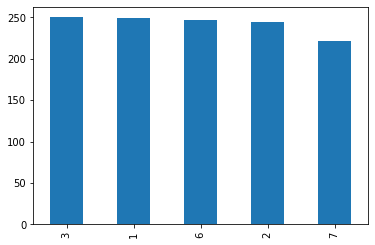

In [70]:
test['genre'].value_counts().plot(kind='bar');

In [71]:
train_data = test.drop(['genre'],axis=1)
target_data = test[['genre']]
train_data=train_data.fillna(0)

In [72]:
matrix=[]
for lyrics in train_data['가사']:
    lyric_X = []
    lyric_X = okt.nouns(lyrics)
    matrix.append(lyric_X)

In [73]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 35000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(matrix)
sequences = tokenizer.texts_to_sequences(matrix)
train_data['가사'] =  sequences
print(max(len(l) for l in train_data['가사']))
print(sum(map(len,train_data['가사']))/len(train_data['가사']))

517
103.06518151815182


In [74]:
max_len = 517
data = pad_sequences(sequences, maxlen=max_len)
sequences=data

In [75]:
data.shape

(1212, 517)

In [76]:
train_data = np.array(train_data)

In [77]:
train_data=np.delete(train_data, 0, axis=1)

In [78]:
train_data=np.append(train_data, data, axis=1)
train_data

array([[1.0, 2.0, 1.0, ..., 258, 3, 627],
       [4.0, 1.0, 2.0, ..., 399, 18, 399],
       [1.0, 1.0, 2.0, ..., 409, 4, 138],
       ...,
       [4.0, 1.0, 2.0, ..., 77, 77, 77],
       [3.0, 1.0, 1.0, ..., 4, 45, 86],
       [2.0, 2.0, 2.0, ..., 9, 5, 1393]], dtype=object)

In [79]:
x_train,x_test,y_train,y_test = train_test_split(train_data,target_data,test_size=0.3)
x_test[0:5]
y_train=y_train.fillna(0)

In [80]:
y_test = np.array(y_test)
y_train = np.array(y_train)
x_train = np.array(list(x for x in x_train))
x_test = np.array(x_test)
x_train

array([[4.0, 2.0, 1.0, ..., 446, 2, 446],
       [1.0, 1.0, 2.0, ..., 309, 3, 4],
       [1.0, 2.0, 1.0, ..., 72, 44, 2],
       ...,
       [4.0, 1.0, 1.0, ..., 300, 7, 8],
       [1.0, 2.0, 3.0, ..., 380, 1518, 200],
       [1.0, 2.0, 1.0, ..., 304, 60, 92]], dtype=object)

In [84]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

print('training set accuracy:',tree.score(x_train, y_train))
print('test set accuracy:',tree.score(x_test,y_test))

prediction_by_tree = tree.predict(x_test)
prediction_by_tree

training set accuracy: 0.9952830188679245
test set accuracy: 0.47527472527472525


array([1, 2, 7, 6, 2, 6, 7, 7, 2, 3, 6, 3, 3, 1, 1, 3, 6, 6, 6, 1, 6, 7,
       7, 1, 2, 2, 3, 2, 3, 2, 6, 3, 1, 6, 1, 3, 2, 6, 2, 6, 1, 3, 1, 6,
       2, 7, 2, 6, 6, 2, 7, 7, 1, 2, 1, 3, 6, 3, 3, 3, 2, 6, 3, 2, 7, 2,
       6, 3, 1, 1, 2, 6, 3, 3, 7, 3, 6, 2, 6, 3, 6, 6, 6, 1, 7, 3, 6, 2,
       6, 3, 6, 1, 6, 1, 1, 1, 6, 7, 1, 6, 6, 2, 1, 6, 6, 3, 2, 2, 1, 3,
       2, 1, 3, 3, 2, 2, 1, 7, 3, 7, 2, 2, 1, 6, 1, 6, 6, 2, 6, 7, 1, 6,
       6, 2, 2, 6, 3, 6, 6, 6, 6, 3, 3, 3, 7, 7, 3, 3, 3, 2, 3, 6, 1, 6,
       6, 7, 6, 3, 2, 3, 3, 6, 6, 1, 2, 1, 3, 1, 7, 1, 3, 7, 1, 1, 2, 1,
       1, 6, 6, 1, 6, 2, 3, 3, 1, 6, 3, 6, 6, 6, 7, 1, 7, 2, 6, 1, 3, 3,
       7, 6, 7, 1, 3, 3, 2, 6, 6, 7, 6, 1, 1, 1, 1, 6, 6, 2, 3, 2, 7, 2,
       7, 3, 2, 7, 3, 7, 6, 6, 3, 1, 2, 3, 6, 2, 2, 1, 6, 3, 6, 6, 2, 7,
       6, 7, 2, 2, 3, 3, 6, 2, 6, 2, 3, 2, 6, 1, 3, 2, 6, 2, 2, 6, 1, 7,
       1, 6, 2, 6, 2, 7, 2, 2, 3, 1, 1, 7, 2, 6, 2, 6, 7, 3, 2, 6, 1, 1,
       6, 6, 2, 3, 6, 2, 2, 6, 2, 7, 6, 3, 1, 3, 3,

In [85]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(x_train,y_train)

print('training set accuracy:',forest.score(x_train,y_train))
print('test set accuracy:',forest.score(x_test,y_test))

prediction_by_forest = forest.predict(x_test)
prediction_by_forest

training set accuracy: 0.9846698113207547
test set accuracy: 0.45879120879120877


C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([2, 2, 6, 2, 6, 1, 1, 7, 2, 3, 2, 3, 3, 3, 1, 3, 7, 1, 2, 1, 1, 7,
       7, 1, 1, 3, 3, 1, 3, 2, 1, 1, 3, 2, 3, 2, 6, 6, 2, 2, 6, 3, 7, 2,
       1, 7, 6, 1, 6, 2, 7, 7, 3, 3, 1, 1, 2, 6, 3, 3, 2, 1, 3, 2, 7, 6,
       2, 3, 1, 1, 6, 6, 1, 3, 7, 3, 1, 3, 6, 3, 2, 6, 1, 1, 7, 2, 2, 7,
       6, 3, 6, 6, 6, 6, 2, 1, 7, 3, 6, 1, 6, 2, 2, 6, 1, 3, 6, 1, 7, 3,
       2, 1, 3, 3, 1, 2, 1, 7, 1, 7, 7, 3, 6, 1, 1, 2, 1, 6, 1, 7, 1, 6,
       6, 6, 6, 6, 3, 7, 1, 2, 6, 3, 3, 3, 7, 7, 3, 3, 3, 2, 3, 2, 1, 7,
       1, 1, 6, 3, 7, 1, 3, 6, 7, 3, 7, 1, 2, 1, 6, 2, 3, 6, 1, 1, 2, 6,
       2, 2, 1, 1, 1, 1, 3, 7, 1, 6, 6, 6, 7, 1, 1, 1, 7, 2, 1, 1, 3, 3,
       7, 1, 7, 7, 3, 3, 7, 6, 2, 7, 3, 1, 1, 1, 2, 1, 1, 1, 3, 2, 7, 2,
       7, 2, 7, 1, 2, 1, 6, 7, 3, 1, 1, 3, 6, 3, 6, 6, 7, 3, 7, 7, 1, 6,
       6, 6, 1, 3, 3, 2, 7, 1, 6, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 6, 6,
       1, 1, 3, 1, 7, 7, 2, 2, 2, 1, 7, 6, 1, 1, 3, 1, 7, 3, 2, 1, 2, 2,
       1, 1, 1, 3, 3, 6, 2, 2, 1, 7, 6, 3, 2, 2, 3,

In [88]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

print('training set accuracy:',model.score(x_train,y_train))
print('test set accuracy:',model.score(x_test,y_test))

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training set accuracy: 0.6851415094339622
test set accuracy: 0.4642857142857143
